# MEGHALYA

In [405]:
import pandas as pd

# Load the datasets for Meghalaya
df_mg_enrolment = pd.read_csv('/content/Meghalya Enrolment State.csv')
df_mg_demographic = pd.read_csv('/content/Meghalya Demographic State.csv')
df_mg_biometric = pd.read_csv('/content/Meghalya Biometric State.csv')

print("Meghalaya Enrolment Dataset:")
print(df_mg_enrolment.head())
print(df_mg_enrolment.info())
print(df_mg_enrolment.describe())

print("\nMeghalaya Demographic Dataset:")
print(df_mg_demographic.head())
print(df_mg_demographic.info())
print(df_mg_demographic.describe())

print("\nMeghalaya Biometric Dataset:")
print(df_mg_biometric.head())
print(df_mg_biometric.info())
print(df_mg_biometric.describe())

Meghalaya Enrolment Dataset:
         date      state          district  pincode  age_0_5  age_5_17  \
0  01-09-2025  Meghalaya   East Garo Hills   794002        0         1   
1  01-09-2025  Meghalaya  East Khasi Hills   793002        1         0   
2  01-09-2025  Meghalaya  East Khasi Hills   793004        0         3   
3  01-09-2025  Meghalaya  East Khasi Hills   793108        0         4   
4  01-09-2025  Meghalaya  East Khasi Hills   793111        1         4   

   age_18_greater  
0               0  
1               2  
2               1  
3               3  
4               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            4384 non-null   object
 1   state           4384 non-null   object
 2   district        4384 non-null   object
 3   pincode         4384 non-null   int64 
 4   age_0_5         4384 non-null  

In [406]:
# Convert 'date' column to datetime objects
df_mg_enrolment['date'] = pd.to_datetime(df_mg_enrolment['date'], format='%d-%m-%Y')
df_mg_demographic['date'] = pd.to_datetime(df_mg_demographic['date'], format='%d-%m-%Y')
df_mg_biometric['date'] = pd.to_datetime(df_mg_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_enrolment:")
print(df_mg_enrolment.info())
print("\nData types after conversion for df_demographic:")
print(df_mg_demographic.info())
print("\nData types after conversion for df_biometric:")
print(df_mg_biometric.info())

Data types after conversion for df_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            4384 non-null   datetime64[ns]
 1   state           4384 non-null   object        
 2   district        4384 non-null   object        
 3   pincode         4384 non-null   int64         
 4   age_0_5         4384 non-null   int64         
 5   age_5_17        4384 non-null   int64         
 6   age_18_greater  4384 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 239.9+ KB
None

Data types after conversion for df_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5941 entries, 0 to 5940
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           5941 non-null   datetime64[

In [407]:
merged_mg_rj_temp = pd.merge(df_mg_enrolment, df_mg_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_mg_merged = pd.merge(merged_mg_rj_temp, df_mg_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols = df_mg_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_mg_merged[numeric_cols] = df_mg_merged[numeric_cols].fillna(0)

print("Merged DataFrame (df_merged) head:")
print(df_mg_merged.head())
print("\nMerged DataFrame (df_merged) info:")
print(df_mg_merged.info())

print("Shape of df_merged:", df_mg_merged.shape)
print("\nInfo of df_mg_merged:")
df_mg_merged.info()
print("\nDescription of df_mg_merged:")
print(df_mg_merged.describe())

df_mg = df_mg_merged[df_mg_merged['state'] == 'Meghalaya'].copy() # Corrected state name to 'Meghalaya'
df_mg['year'] = df_mg['date'].dt.year
df_mg['month'] = df_mg['date'].dt.month

print("Shape of df_mg:", df_mg.shape)
print("\nFirst 5 rows of df_mg with new 'year' and 'month' columns:")
print(df_mg.head())

Merged DataFrame (df_merged) head:
        date      state            district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Meghalaya     East Garo Hills   794110      0.0       0.0   
1 2025-03-01  Meghalaya     East Garo Hills   794111      0.0       0.0   
2 2025-03-01  Meghalaya  East Jaintia Hills   793160      0.0       0.0   
3 2025-03-01  Meghalaya  East Jaintia Hills   793200      0.0       0.0   
4 2025-03-01  Meghalaya    East Khasi Hills   793001      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0           14.0         516.0          28.0        231.0  
1             0.0           26.0        1020.0          47.0        132.0  
2             0.0           91.0         455.0          69.0         40.0  
3             0.0           82.0         714.0          67.0         50.0  
4             0.0           14.0         240.0          58.0        160.0  

Merged DataFrame (df_merged) info:
<class 'pandas.core.fr

In [408]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_mg_agg = df_mg.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_mg_agg) head:")
print(df_mg_agg.head())
print("\nAggregated DataFrame (df_mg_agg) info:")
print(df_mg_agg.info())

Aggregated DataFrame (df_mg_agg) head:
   year  month      state            district  age_0_5  age_5_17  \
0  2025      3  Meghalaya     East Garo Hills      0.0       0.0   
1  2025      3  Meghalaya  East Jaintia Hills      0.0       0.0   
2  2025      3  Meghalaya    East Khasi Hills     44.0      92.0   
3  2025      3  Meghalaya    North Garo Hills      0.0       0.0   
4  2025      3  Meghalaya             Ri Bhoi     30.0      11.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0           40.0        1536.0          75.0        363.0  
1             0.0          173.0        1169.0         136.0         90.0  
2           164.0          525.0        4368.0         840.0       1744.0  
3             0.0           36.0        1095.0          79.0         75.0  
4            26.0          263.0        2346.0         213.0        213.0  

Aggregated DataFrame (df_mg_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 en

In [409]:
import numpy as np

# 1. Create 'totalenrolments' column
df_mg_agg['totalenrolments'] = df_mg_agg['age_0_5'] + df_mg_agg['age_5_17'] + df_mg_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_mg_agg['childenrolments'] = df_mg_agg['age_0_5'] + df_mg_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_mg_agg['totaldemoupdates'] = df_mg_agg['demo_age_5_17'] + df_mg_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_mg_agg['totalbioupdates'] = df_mg_agg['bio_age_5_17'] + df_mg_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_mg_agg['CES'] = np.where(
    df_mg_agg['totalenrolments'] == 0,
    0,
    df_mg_agg['childenrolments'] / df_mg_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_mg_agg['DUR'] = np.where(
    df_mg_agg['totalenrolments'] == 0,
    0,
    df_mg_agg['totaldemoupdates'] / df_mg_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_mg_agg['BUR'] = np.where(
    df_mg_agg['totalenrolments'] == 0,
    0,
    df_mg_agg['totalbioupdates'] / df_mg_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_mg_agg) with new metrics head:")
print(df_mg_agg.head())

Aggregated DataFrame (df_mg_agg) with new metrics head:
   year  month      state            district  age_0_5  age_5_17  \
0  2025      3  Meghalaya     East Garo Hills      0.0       0.0   
1  2025      3  Meghalaya  East Jaintia Hills      0.0       0.0   
2  2025      3  Meghalaya    East Khasi Hills     44.0      92.0   
3  2025      3  Meghalaya    North Garo Hills      0.0       0.0   
4  2025      3  Meghalaya             Ri Bhoi     30.0      11.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0           40.0        1536.0          75.0        363.0   
1             0.0          173.0        1169.0         136.0         90.0   
2           164.0          525.0        4368.0         840.0       1744.0   
3             0.0           36.0        1095.0          79.0         75.0   
4            26.0          263.0        2346.0         213.0        213.0   

   totalenrolments  childenrolments  totaldemoupdates  totalbioupdates  

In [410]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_mg_agg['Enorm'] = df_mg_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_mg_agg['Dnorm'] = df_mg_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', 'month' and 'state'
df_mg_agg['Bnorm'] = df_mg_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_mg_agg['stdnorm'] = (df_mg_agg['Enorm'] + df_mg_agg['Dnorm'] + df_mg_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_mg_agg['ALBI'] = 1 - df_mg_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_mg_agg['ALBI'] = df_mg_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_mg_agg) with normalized metrics and ALBI head:")
print(df_mg_agg.head())

Aggregated DataFrame (df_mg_agg) with normalized metrics and ALBI head:
   year  month      state            district  age_0_5  age_5_17  \
0  2025      3  Meghalaya     East Garo Hills      0.0       0.0   
1  2025      3  Meghalaya  East Jaintia Hills      0.0       0.0   
2  2025      3  Meghalaya    East Khasi Hills     44.0      92.0   
3  2025      3  Meghalaya    North Garo Hills      0.0       0.0   
4  2025      3  Meghalaya             Ri Bhoi     30.0      11.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...  \
0             0.0           40.0        1536.0          75.0  ...   
1             0.0          173.0        1169.0         136.0  ...   
2           164.0          525.0        4368.0         840.0  ...   
3             0.0           36.0        1095.0          79.0  ...   
4            26.0          263.0        2346.0         213.0  ...   

   totaldemoupdates  totalbioupdates       CES        DUR       BUR     Enorm  \
0            1576.0    

In [411]:
df_mg_agg['Enormrisk'] = 1 - df_mg_agg['Enorm']
df_mg_agg['CESrisknorm'] = 1 - df_mg_agg['CES']
df_mg_agg['DURrisknorm'] = 1 - df_mg_agg['DUR']
df_mg_agg['BURrisknorm'] = 1 - df_mg_agg['BUR']
df_mg_agg['ALBIrisknorm'] = 1 - df_mg_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_mg_agg['riskscore'] = (
    df_mg_agg['Enormrisk'] +
    df_mg_agg['CESrisknorm'] +
    df_mg_agg['DURrisknorm'] +
    df_mg_agg['BURrisknorm'] +
    df_mg_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_mg_agg) with risk components and riskscore head:")
print(df_mg_agg.head())

Aggregated DataFrame (df_mg_agg) with risk components and riskscore head:
   year  month      state            district  age_0_5  age_5_17  \
0  2025      3  Meghalaya     East Garo Hills      0.0       0.0   
1  2025      3  Meghalaya  East Jaintia Hills      0.0       0.0   
2  2025      3  Meghalaya    East Khasi Hills     44.0      92.0   
3  2025      3  Meghalaya    North Garo Hills      0.0       0.0   
4  2025      3  Meghalaya             Ri Bhoi     30.0      11.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm  \
0             0.0           40.0        1536.0          75.0  ...  0.254153   
1             0.0          173.0        1169.0         136.0  ...  0.216417   
2           164.0          525.0        4368.0         840.0  ...  0.789066   
3             0.0           36.0        1095.0          79.0  ...  0.182390   
4            26.0          263.0        2346.0         213.0  ...  0.420739   

      Bnorm   stdnorm      ALBI  Enormrisk

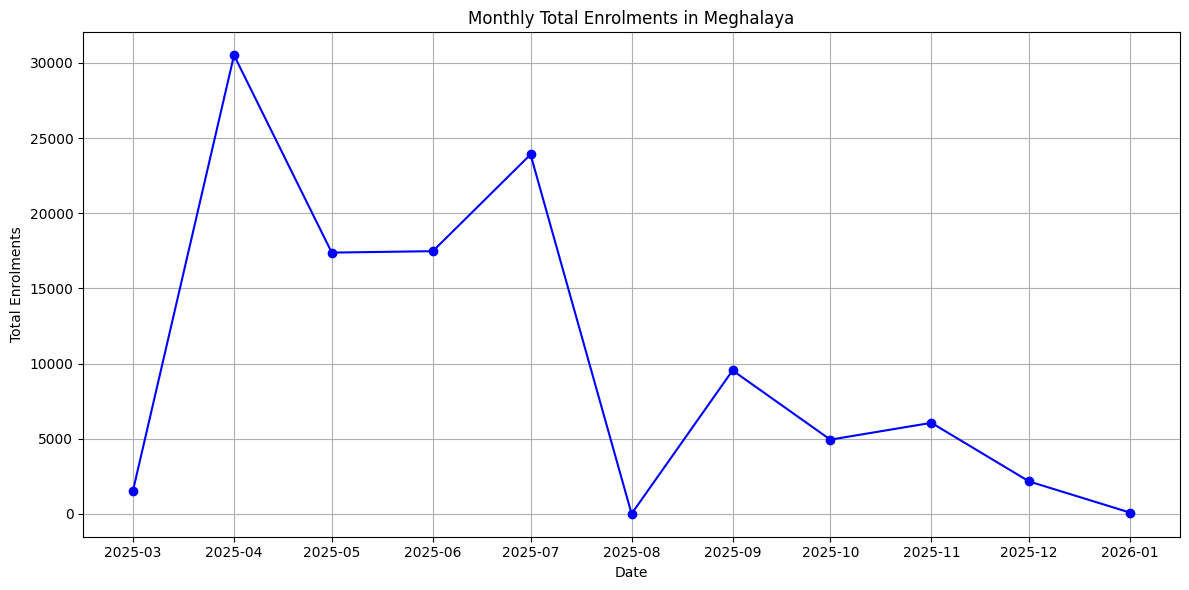

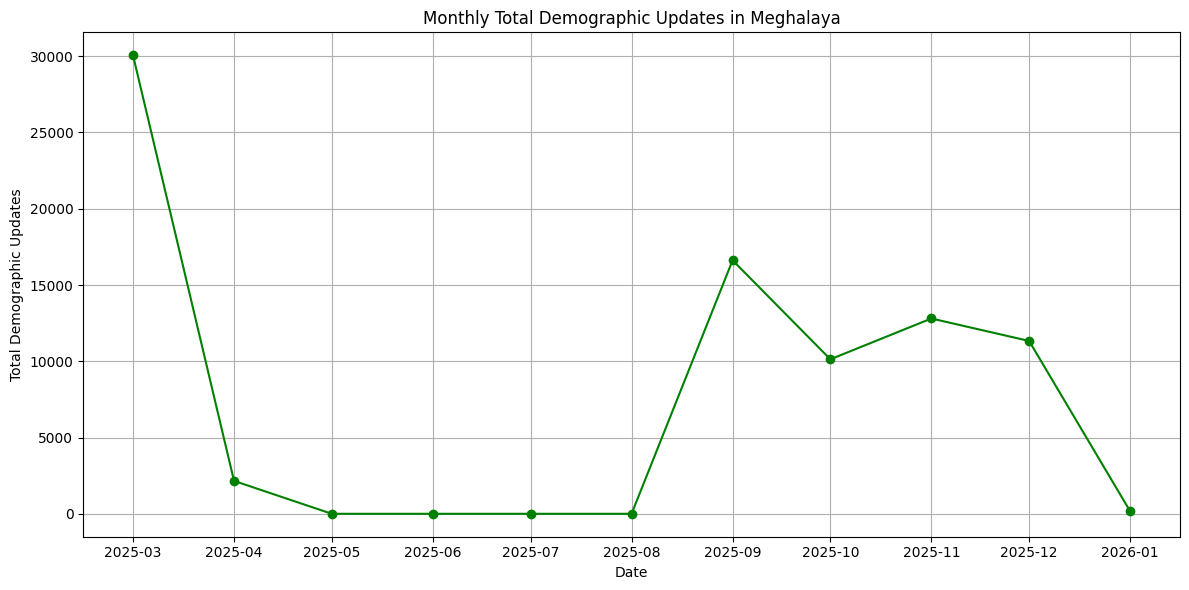

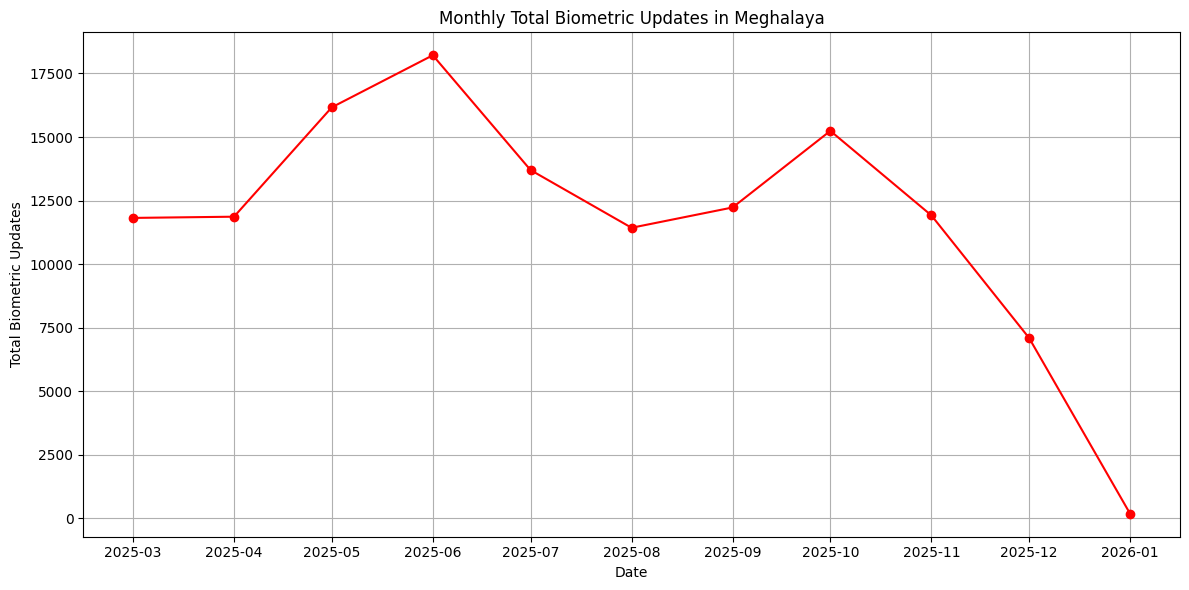

Monthly trend plots generated successfully.


In [412]:
import matplotlib.pyplot as plt

df_mg_monthly_trends = df_mg_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_mg_monthly_trends['date'] = pd.to_datetime(df_mg_monthly_trends['year'].astype(str) + '-' + df_mg_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_mg_monthly_trends = df_mg_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mg_monthly_trends['date'], df_mg_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Meghalaya')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mg_monthly_trends['date'], df_mg_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Meghalaya')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_mg_monthly_trends['date'], df_mg_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Meghalaya')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**UNIVARIATE ANALYSIS**

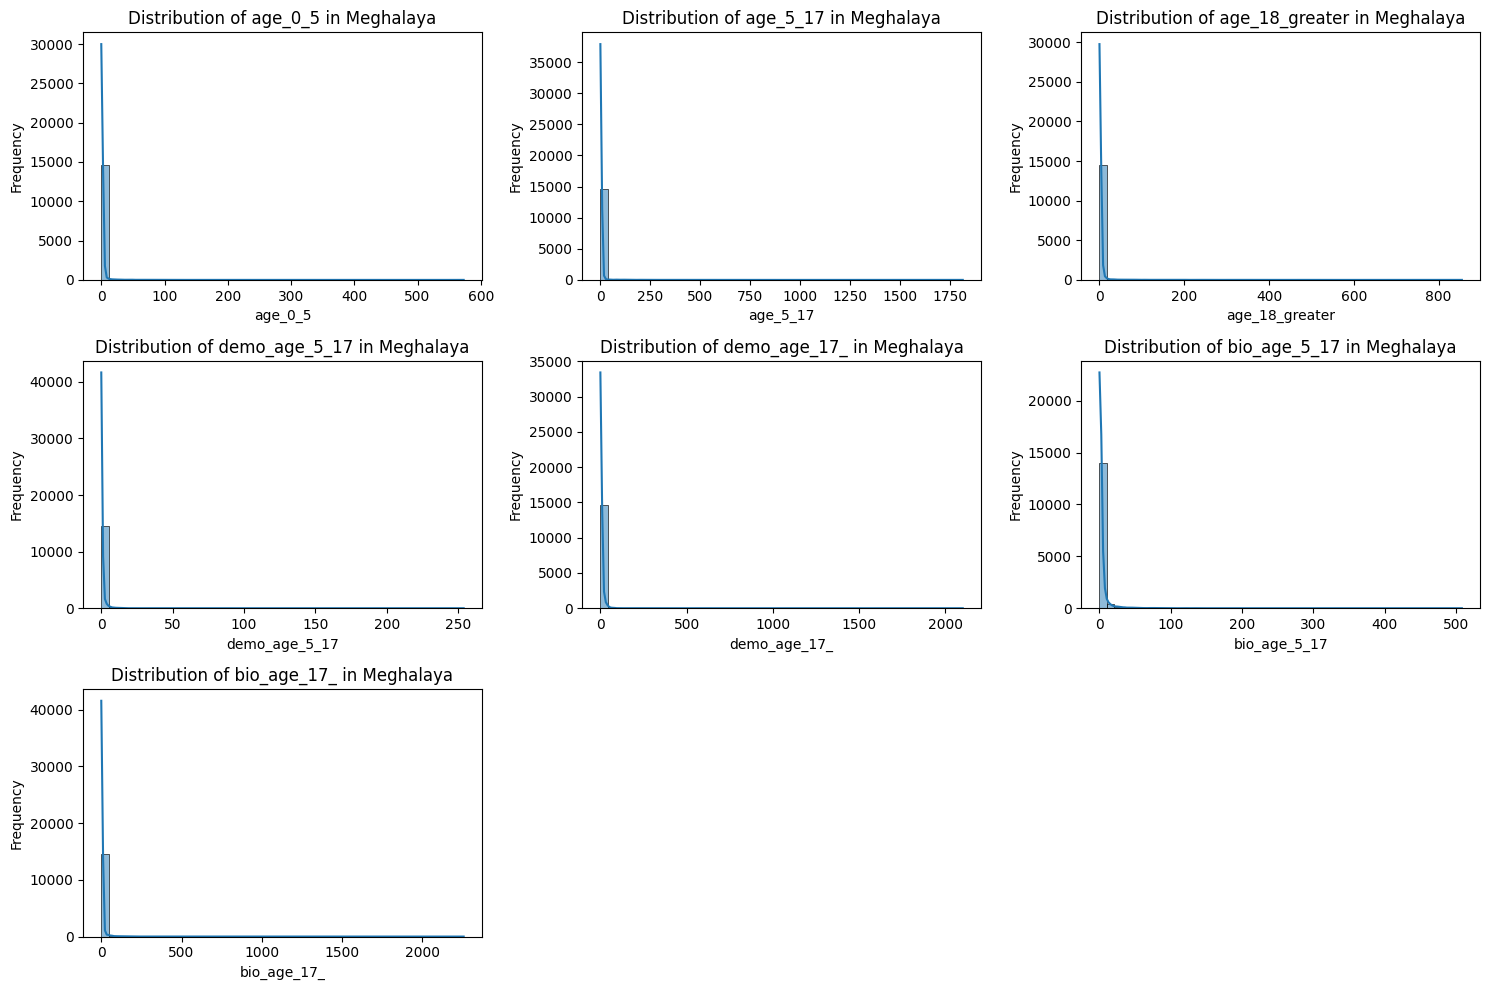

Histograms for numerical age-related columns displayed for Meghalaya.


In [413]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical age-related columns from df_mg_merged
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_mg_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Meghalaya')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical age-related columns displayed for Meghalaya.")

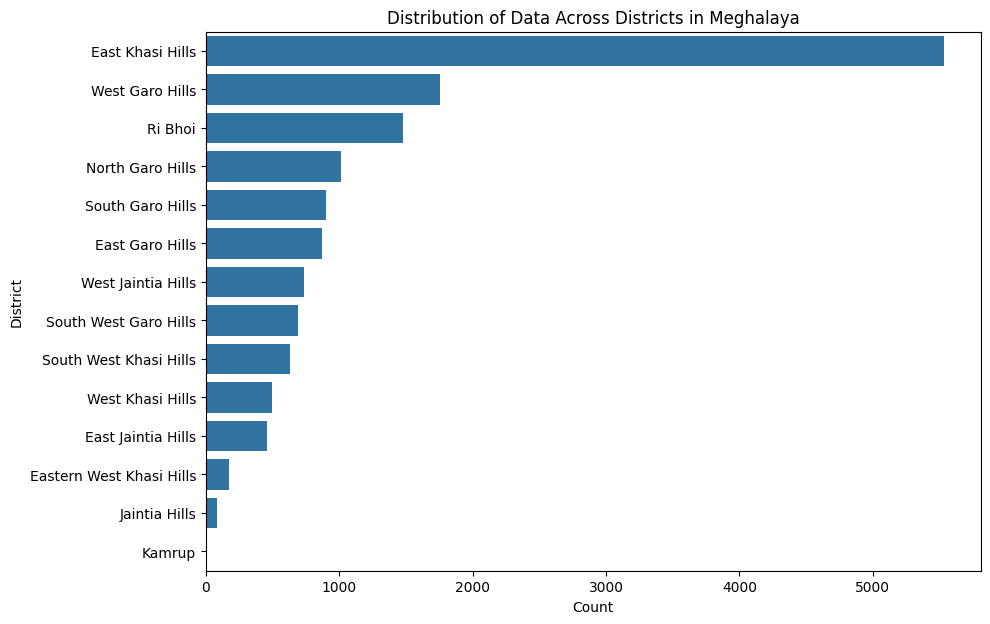

Count plot for 'district' displayed for Meghalaya.


In [414]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.countplot(data=df_mg_merged, y='district', order=df_mg_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Meghalaya')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' displayed for Meghalaya.")

**BIVARIATE AND TRIVARIATE ANALYSIS**

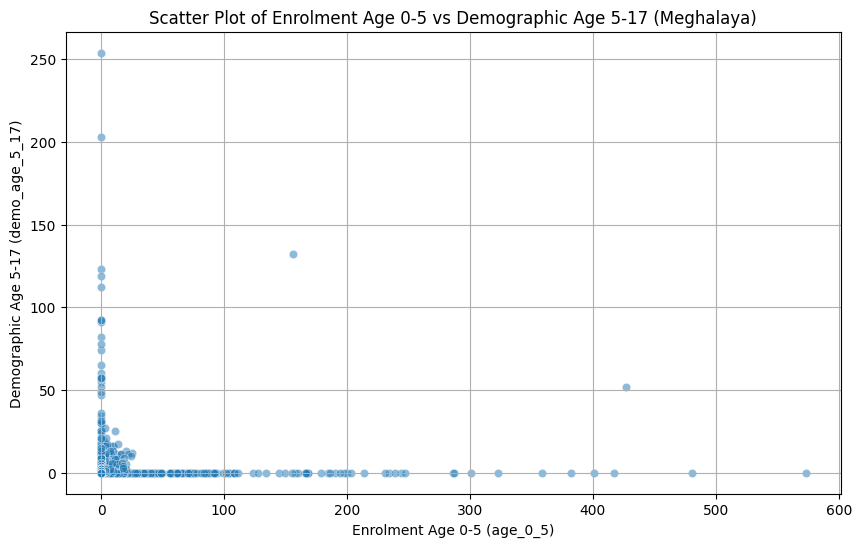

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Meghalaya.


In [415]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mg_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Meghalaya)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Meghalaya.")

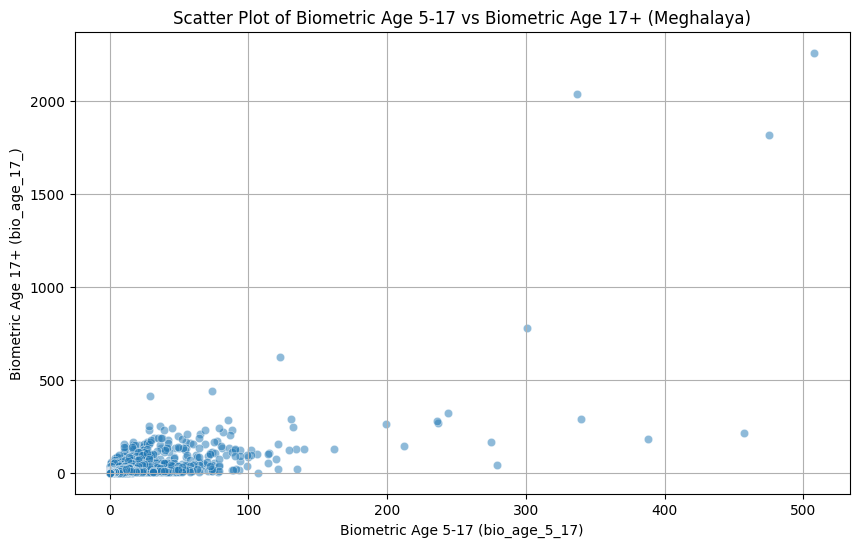

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Meghalaya.


In [416]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mg_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Meghalaya)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Meghalaya.")

Correlation Matrix for Meghalaya:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.807099        0.709019       0.047023   
age_5_17        0.807099  1.000000        0.894184       0.010076   
age_18_greater  0.709019  0.894184        1.000000       0.006259   
demo_age_5_17   0.047023  0.010076        0.006259       1.000000   
demo_age_17_    0.047964  0.009261        0.004963       0.865895   
bio_age_5_17    0.581159  0.474802        0.404044       0.438837   
bio_age_17_     0.384370  0.241798        0.208088       0.292594   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.047964      0.581159     0.384370  
age_5_17            0.009261      0.474802     0.241798  
age_18_greater      0.004963      0.404044     0.208088  
demo_age_5_17       0.865895      0.438837     0.292594  
demo_age_17_        1.000000      0.423683     0.401830  
bio_age_5_17        0.423683      1.000000     0.706353  
bio_age

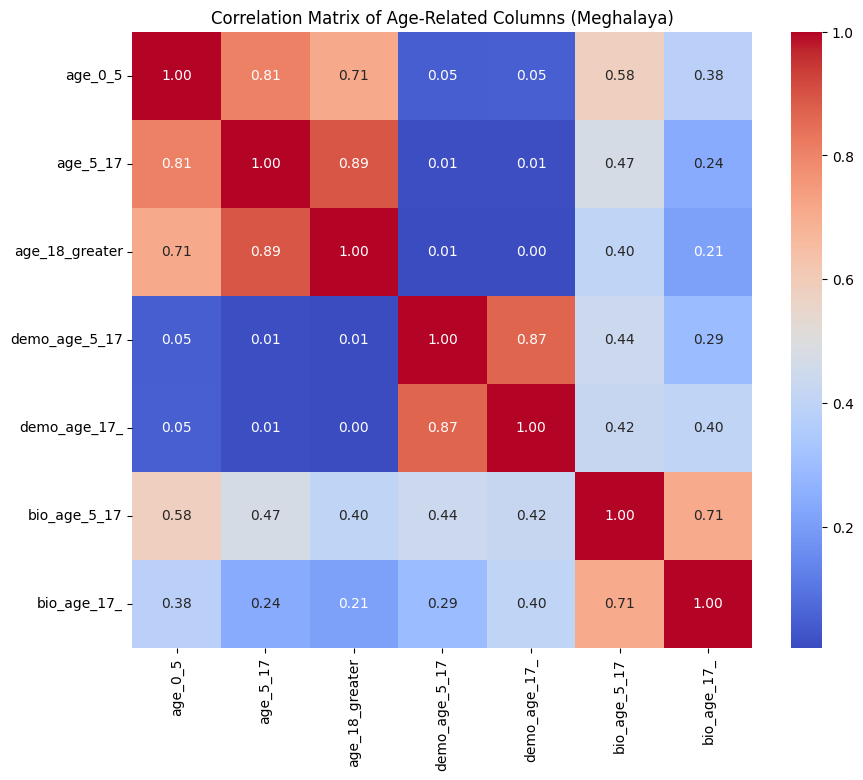

Correlation matrix heatmap for age-related columns displayed for Meghalaya.


In [417]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_mg = df_mg_merged[numerical_age_cols].corr()

print("Correlation Matrix for Meghalaya:")
print(correlation_matrix_mg)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_mg, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Meghalaya)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Meghalaya.")

In [418]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_mg_district_mean = df_mg_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Meghalaya:")
print(df_mg_district_mean.head())
print(df_mg_district_mean.info())

District-wise average age-related data for Meghalaya:
                   district   age_0_5  age_5_17  age_18_greater  \
0           East Garo Hills  1.166858  3.944764        2.031070   
1        East Jaintia Hills  2.175705  5.308026        4.099783   
2          East Khasi Hills  0.780770  2.738840        1.880174   
3  Eastern West Khasi Hills  0.016949  1.333333        3.384181   
4             Jaintia Hills  0.060241  0.012048        0.000000   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0       0.265823      5.341772      1.302647     4.034522  
1       1.047722      6.505423      5.238612     3.403471  
2       0.321525      2.602386      1.987529     3.690584  
3       0.271186      1.451977      0.333333     1.734463  
4       0.012048      0.265060      0.048193     0.855422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          -------------- 

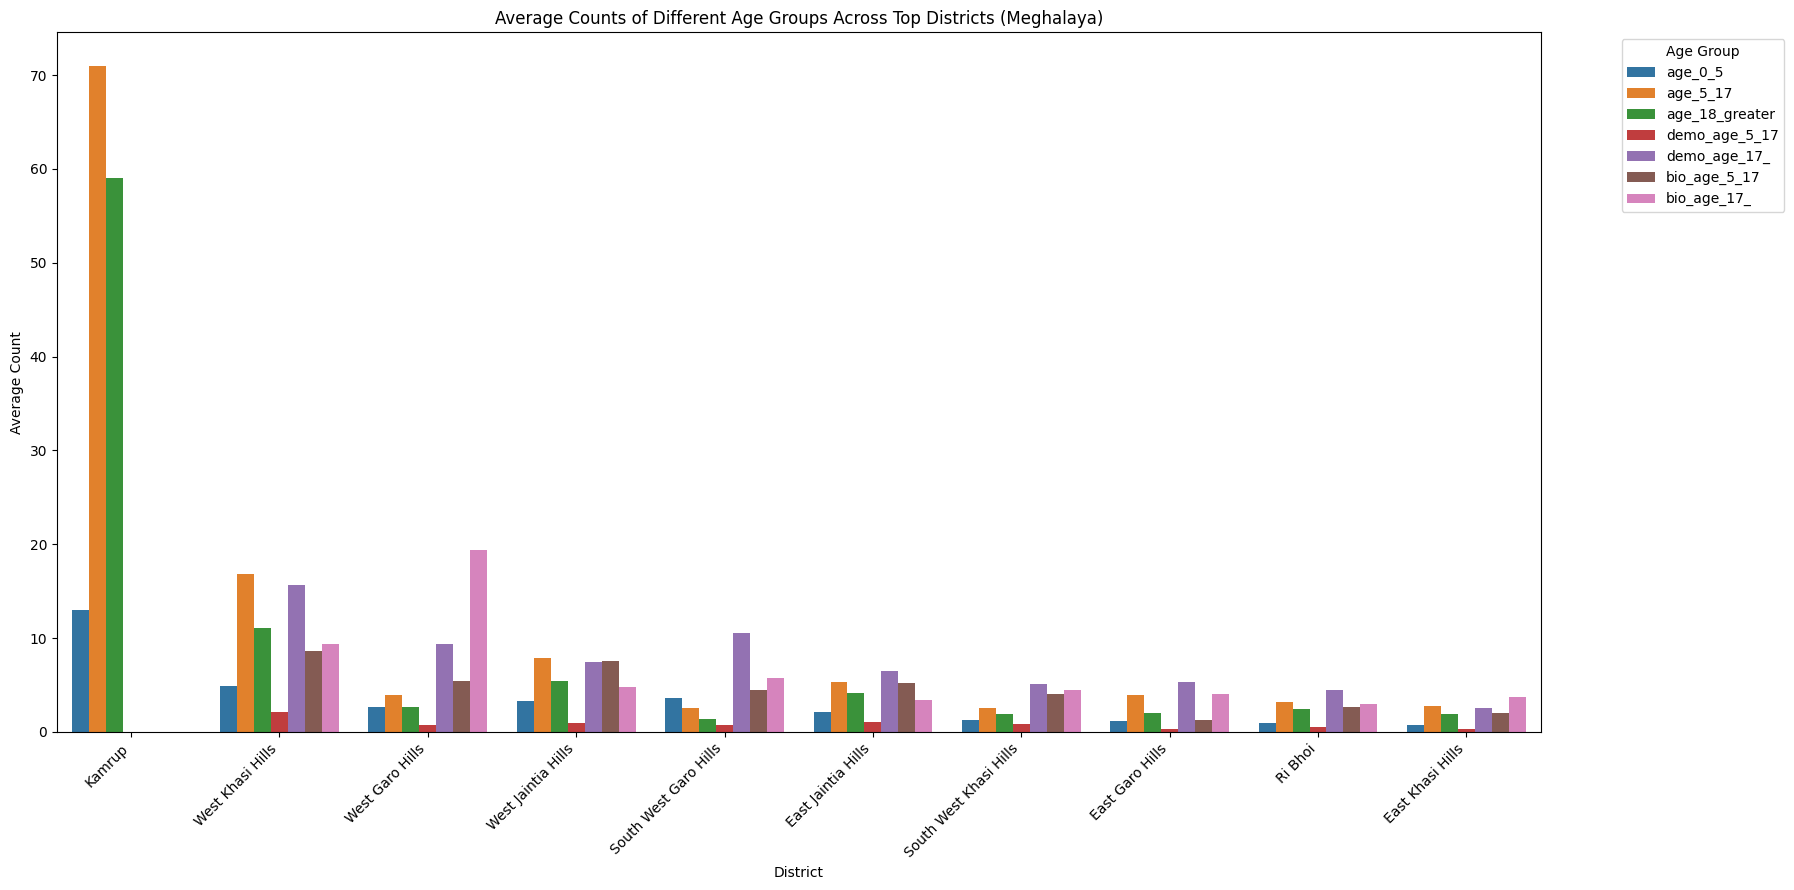

Insight: The grouped bar chart reveals the relative contribution of different age groups to the total average age counts in the top districts of Meghalaya, showing which districts have higher overall activity and how it's distributed across age categories.


In [419]:
df_mg_district_mean['total_avg_age'] = df_mg_district_mean[age_cols_to_group].sum(axis=1)
df_mg_district_mean_top10 = df_mg_district_mean.nlargest(10, 'total_avg_age')

df_mg_district_mean_melted = df_mg_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_mg_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top Districts (Meghalaya)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart reveals the relative contribution of different age groups to the total average age counts in the top districts of Meghalaya, showing which districts have higher overall activity and how it's distributed across age categories.")

Time-series aggregated data (sum of age-related columns per date) for Meghalaya:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0         2348.0       27714.0   
1 2025-03-02     11.0      61.0            37.0            0.0           0.0   
2 2025-03-15    126.0      27.0           178.0            0.0           0.0   
3 2025-03-20     75.0      29.0           297.0            0.0           0.0   
4 2025-03-23     54.0      57.0           129.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0        3554.0       8263.0  
1           0.0          0.0  
2           0.0          0.0  
3           0.0          0.0  
4           0.0          0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            238 non-null    datetim

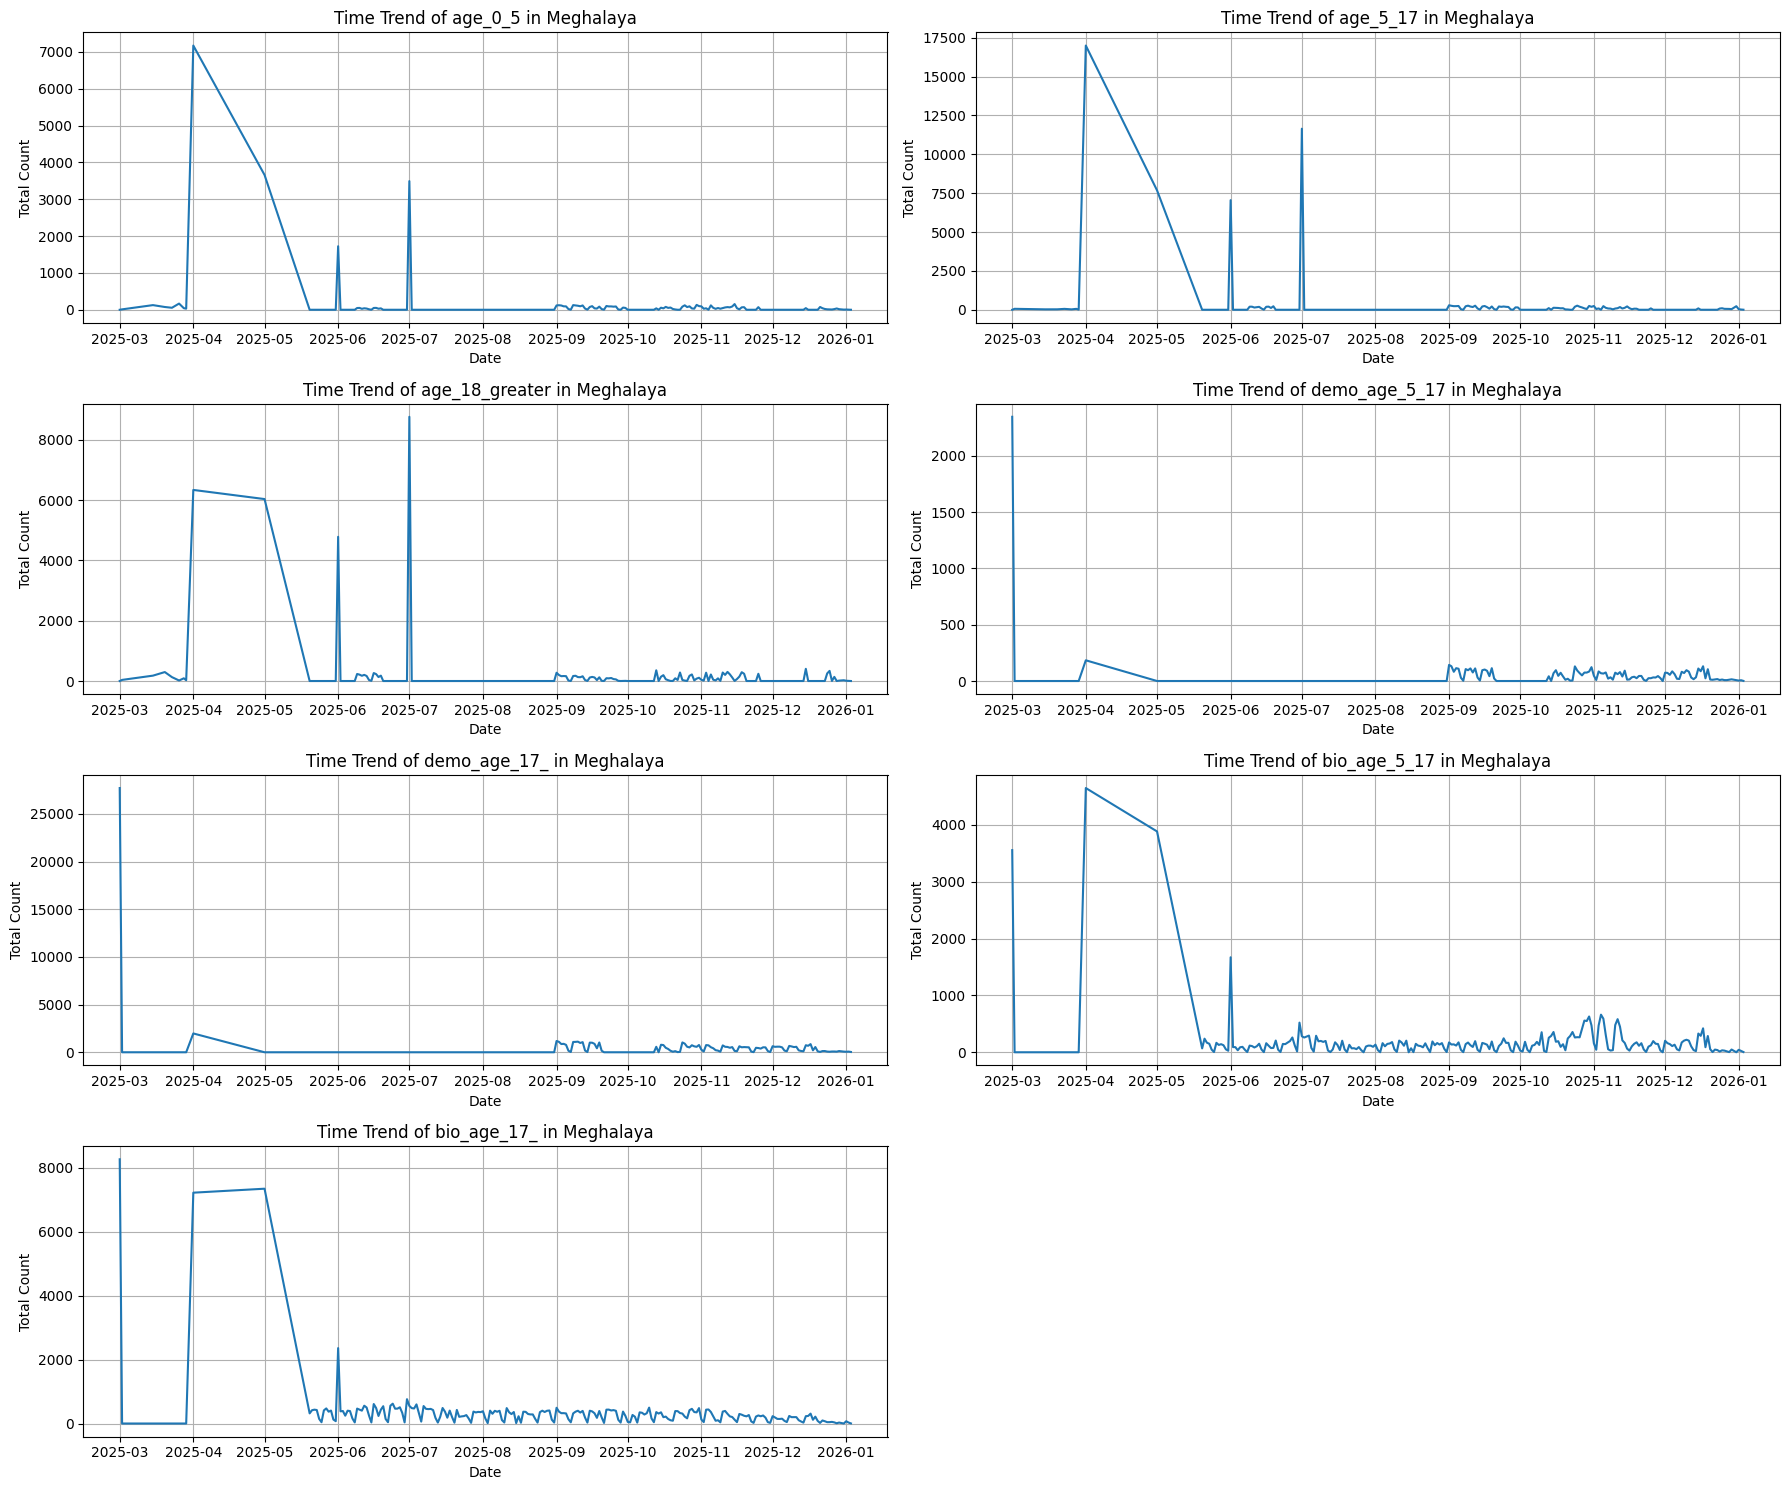

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [420]:
df_mg_time_trend = df_mg_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Meghalaya:")
print(df_mg_time_trend.head())
print(df_mg_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_mg_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Meghalaya')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

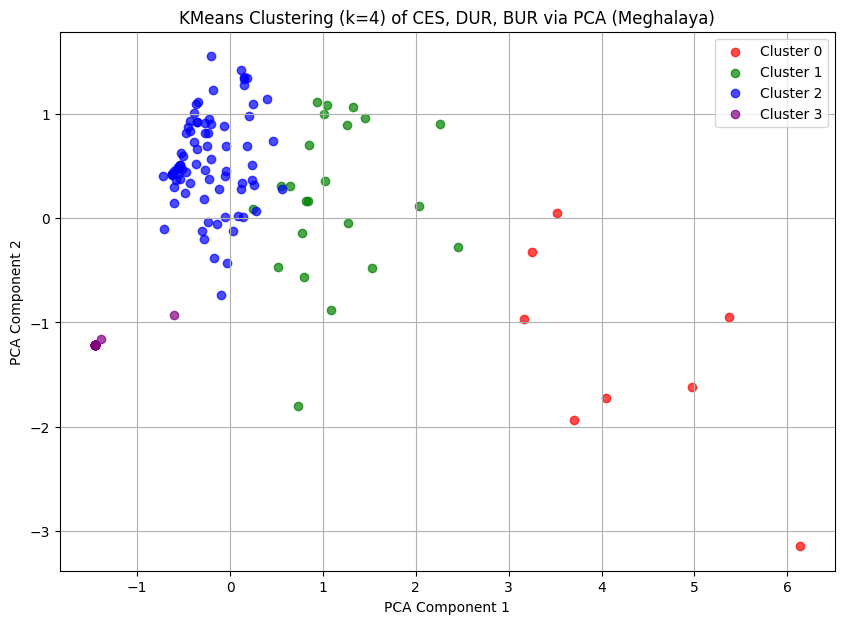

First 5 rows of df_mg_agg with 'clusterlabel' column:
   year  month      state            district  age_0_5  age_5_17  \
0  2025      3  Meghalaya     East Garo Hills      0.0       0.0   
1  2025      3  Meghalaya  East Jaintia Hills      0.0       0.0   
2  2025      3  Meghalaya    East Khasi Hills     44.0      92.0   
3  2025      3  Meghalaya    North Garo Hills      0.0       0.0   
4  2025      3  Meghalaya             Ri Bhoi     30.0      11.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm  \
0             0.0           40.0        1536.0          75.0  ...  0.056248   
1             0.0          173.0        1169.0         136.0  ...  0.029023   
2           164.0          525.0        4368.0         840.0  ...  0.331835   
3             0.0           36.0        1095.0          79.0  ...  0.019777   
4            26.0          263.0        2346.0         213.0  ...  0.054707   

    stdnorm      ALBI  Enormrisk  CESrisknorm  DURrisknorm  BU

In [421]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_mg_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_mg_agg
df_mg_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_mg_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Meghalaya)')
plt.legend()
plt.grid(True)
plt.show()

# 8. Print the head of the DataFrame
print("First 5 rows of df_mg_agg with 'clusterlabel' column:")
print(df_mg_agg.head())

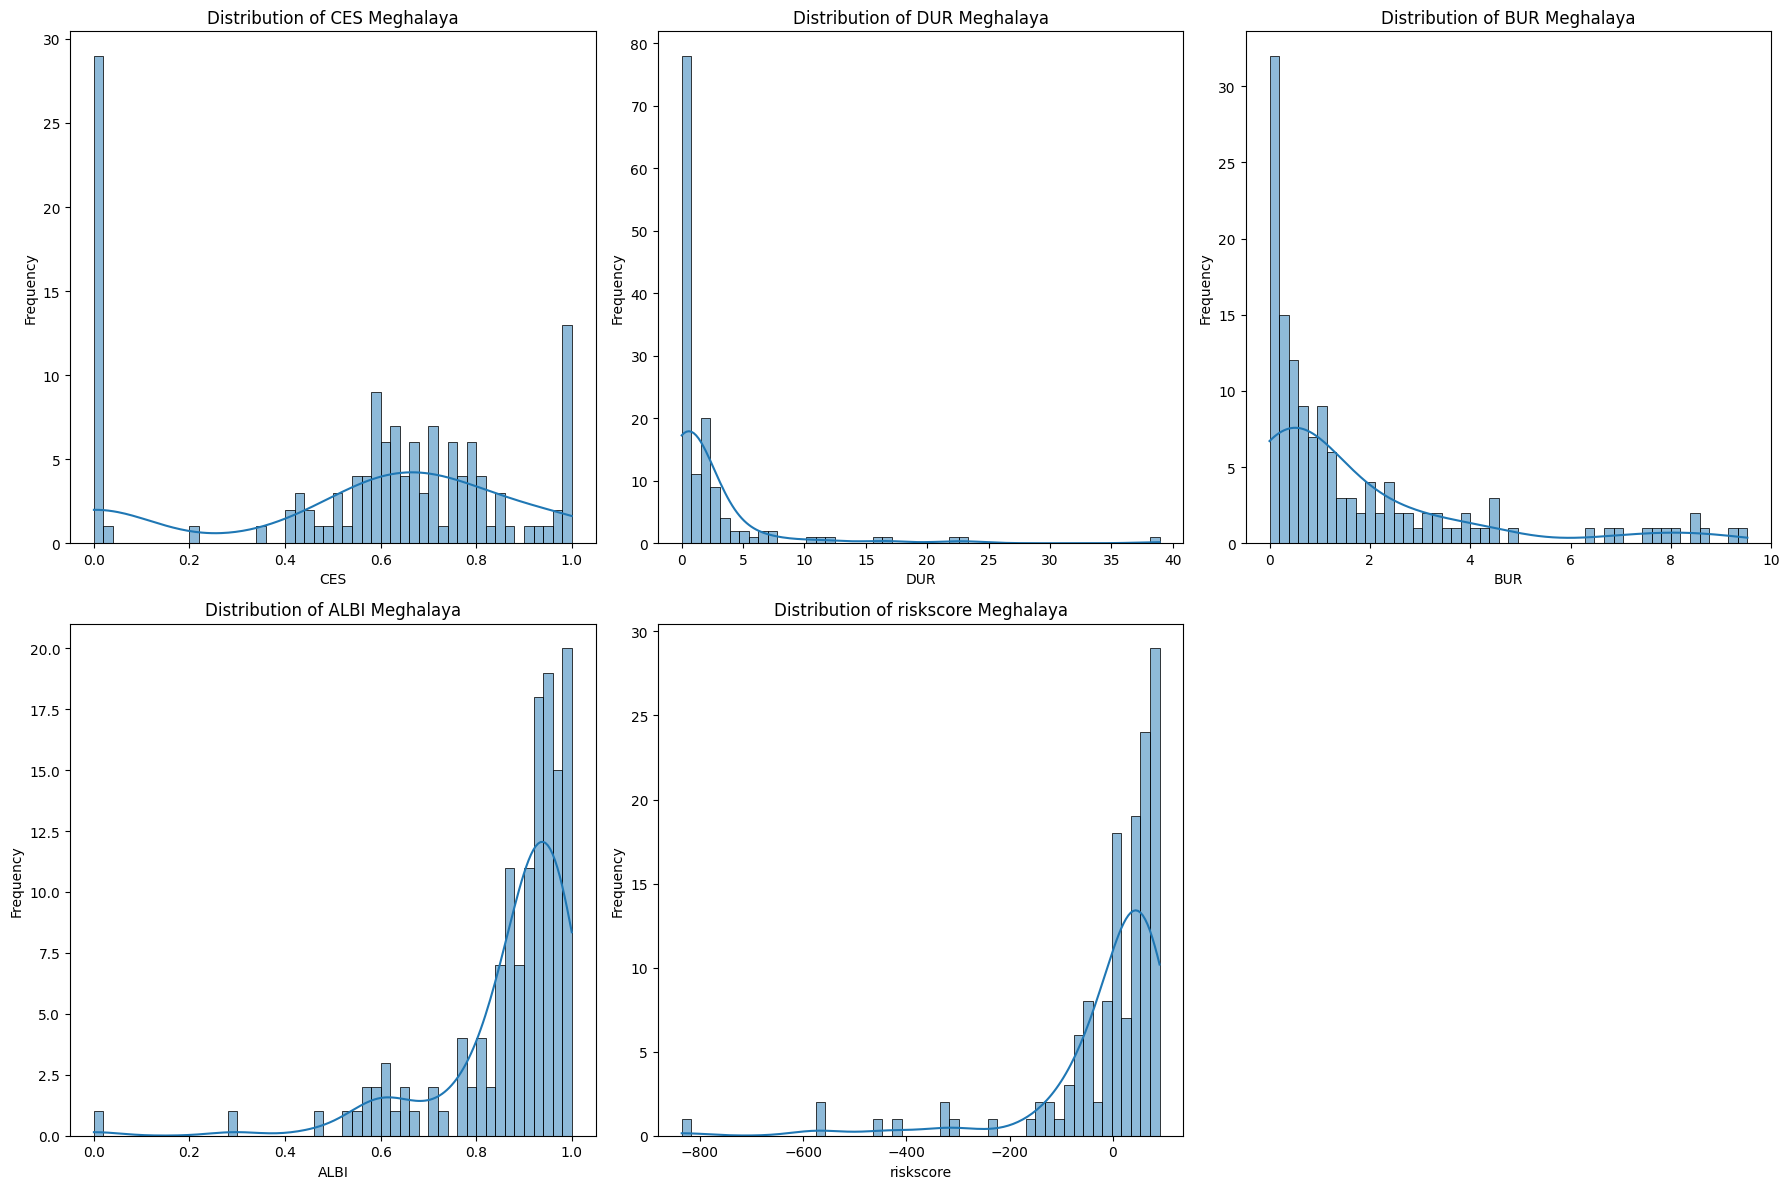

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Meghalaya.


In [424]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_mg_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} Meghalaya')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Meghalaya.")

In [423]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_mg_agg['year'].max()
latest_month = df_mg_agg[df_mg_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_mg_agg for the latest year and month
df_latest_month = df_mg_agg[(df_mg_agg['year'] == latest_year) & (df_mg_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
                district      CES
         East Garo Hills 1.000000
      East Jaintia Hills 1.000000
Eastern West Khasi Hills 1.000000
        North Garo Hills 1.000000
         West Garo Hills 1.000000
                 Ri Bhoi 1.000000
        South Garo Hills 1.000000
   South West Garo Hills 1.000000
        West Khasi Hills 0.875000
      West Jaintia Hills 0.818182

Bottom 10 Districts by CES (Year 2026, Month 1):
                district      CES
  South West Khasi Hills 0.000000
        East Khasi Hills 0.677419
      West Jaintia Hills 0.818182
        West Khasi Hills 0.875000
        North Garo Hills 1.000000
         East Garo Hills 1.000000
      East Jaintia Hills 1.000000
Eastern West Khasi Hills 1.000000
   South West Garo Hills 1.000000
        South Garo Hills 1.000000

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
             district 

## Summary:

### Data Analysis Key Findings

*   The initial data filtering for the state name was corrected from 'Meghalya' to 'Meghalaya', ensuring accurate data processing for 14,827 entries.
*   Various key performance indicators were successfully calculated for Meghalaya, including Child Enrolment Score (CES), Demographic Update Rate (DUR), Biometric Update Rate (BUR), Aadhaar Lifecycle Balance Index (ALBI), and a comprehensive risk score.
*   Monthly trends showed the overall activity for total enrolments, demographic updates, and biometric updates across Meghalaya.
*   Univariate analysis through histograms revealed the distributions of various age-related enrolment and update counts, while a count plot indicated the distribution of data across different districts.
*   Bivariate analysis highlighted relationships between different age groups, such as 'Enrolment Age 0-5' vs 'Demographic Age 5-17', and 'Biometric Age 5-17' vs 'Biometric Age 17+'.
*   A correlation matrix heatmap provided insights into the linear relationships between age-related columns.
*   District-wise average age data identified and visualized top districts based on total average age across age groups, showing varying contributions from different age categories.
*   Time-series plots illustrated the temporal trends for each age-related column, helping to identify periods of activity or change.
*   KMeans clustering identified four distinct clusters among districts based on CES, DUR, and BUR metrics, visualized using PCA to reduce dimensionality.
*   Distributions of CES, DUR, BUR, ALBI, and riskscore were plotted, showcasing their spread and common values. For example, many districts achieved a perfect CES of 1.0 in the latest period.
*   For the latest reporting period (Year 2026, Month 1):
    *   Districts like East Garo Hills, East Jaintia Hills, and North Garo Hills showed a **CES of 1.0**, while South West Khasi Hills had the lowest at 0.0.
    *   South West Garo Hills recorded the highest **DUR at 11.0** and **BUR at 8.0**, with Eastern West Khasi Hills and South West Khasi Hills showing 0.0 for both.
    *   Eastern West Khasi Hills had the highest **ALBI at 0.989**, indicating good balance, while East Khasi Hills showed the lowest at 0.0.
    *   South West Khasi Hills had the highest positive **risk score at 82.27**. However, significantly large negative risk scores were observed in districts like South West Garo Hills (-318.11) and West Garo Hills (-85.07), indicating a persistent issue with the calculation of this metric.

### Insights or Next Steps

*   The recurring issue of significantly negative risk scores across multiple states, including Meghalaya, suggests that the `riskscore` calculation needs to be refined to ensure it consistently yields meaningful positive values within a defined range (e.g., 0-100). This is crucial for accurately identifying and prioritizing high-risk districts.
*   Further investigation is recommended for districts exhibiting extreme values (either very high or very low) in key metrics like DUR, BUR, and ALBI, especially those with zero activity, to understand underlying causes and inform targeted interventions to improve Aadhaar lifecycle management.
